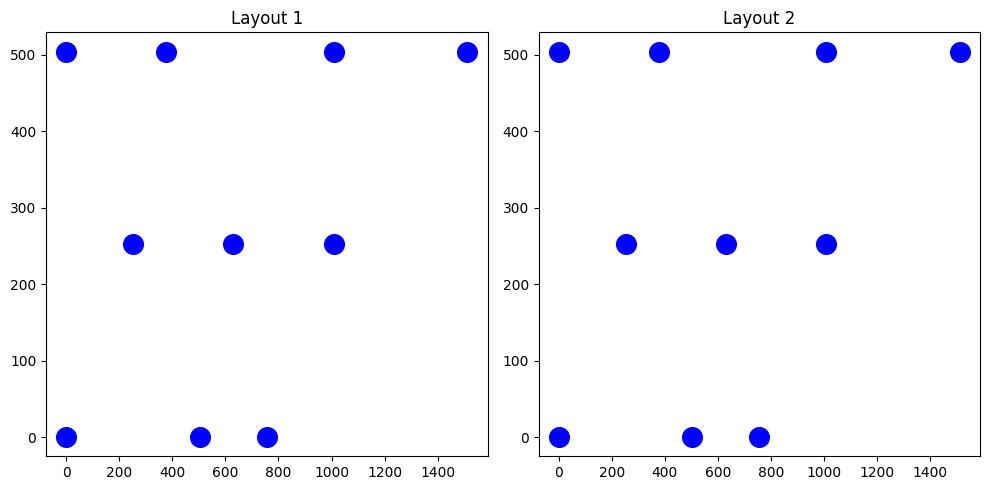

In [4]:
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Define parameters
min_distance = 200
tournament_size = 5
target_coverage_area = 800000
turbine_diameter = 126
mutation_rate = 0.015

def read_csv(df_csv='./Population_1.csv'):
    df = pd.read_csv(df_csv)
    return df

def initialize_populations():
    return [read_csv('./Population_1.csv'), read_csv('./Population_2.csv'), read_csv('./Population_3.csv'),
            read_csv('./Population_11.csv'), read_csv('./Population_12.csv'), read_csv('./Population_13.csv')]

def calculate_fitness(df):
    total_coverage_area = len(df) * np.pi * (turbine_diameter / 2)**2
    fitness = total_coverage_area / target_coverage_area

    coordinates = df[['Layout_x', 'Layout_y']].values
    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            if distance.euclidean(coordinates[i], coordinates[j]) < min_distance:
                fitness *= 0.9  # Apply penalty

    return fitness

def tournament_selection(populations):
    tournament = random.sample(populations, tournament_size)
    return max(tournament, key=calculate_fitness)

def crossover(parent1, parent2):
    child = parent1.copy()
    for column in child.columns:
        child[column] = np.where(np.random.rand(len(child)) < 0.5, parent1[column], parent2[column])
    return child

def mutate(df):
    for i in range(len(df)):
        if np.random.rand() < mutation_rate:
            for j in range(i+1, len(df)):
                while True:
                    new_x = np.random.rand()
                    new_y = np.random.rand()
                    if distance.euclidean([new_x, new_y], df.loc[j, ['Layout_x', 'Layout_y']]) >= min_distance:
                        df.loc[i, 'Layout_x'] = int(new_x)
                        df.loc[i, 'Layout_y'] = int(new_y)
                        break
    return df

def run_genetic_algorithm(populations):
    for _ in range(20):
        next_gen = []
        for _ in range(len(populations)):
            parent1 = tournament_selection(populations)
            parent2 = tournament_selection(populations)
            child = crossover(parent1, parent2)
            child = mutate(child)
            next_gen.append(child)
        populations = next_gen

    # Sort populations by fitness and return the top 2
    populations.sort(key=calculate_fitness, reverse=True)
    return populations[:2]

def plot_best_layouts(best_layouts):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for i, layout in enumerate(best_layouts):
        ax = axs[i]
        ax.scatter(layout['Layout_x'], layout['Layout_y'], c='b', s=200)
        ax.set_title(f'Layout {i+1}')
    plt.tight_layout()
    plt.show()

def main():
    populations = initialize_populations()
    best_layouts = run_genetic_algorithm(populations)
    plot_best_layouts(best_layouts)

if __name__ == "__main__":
    main()

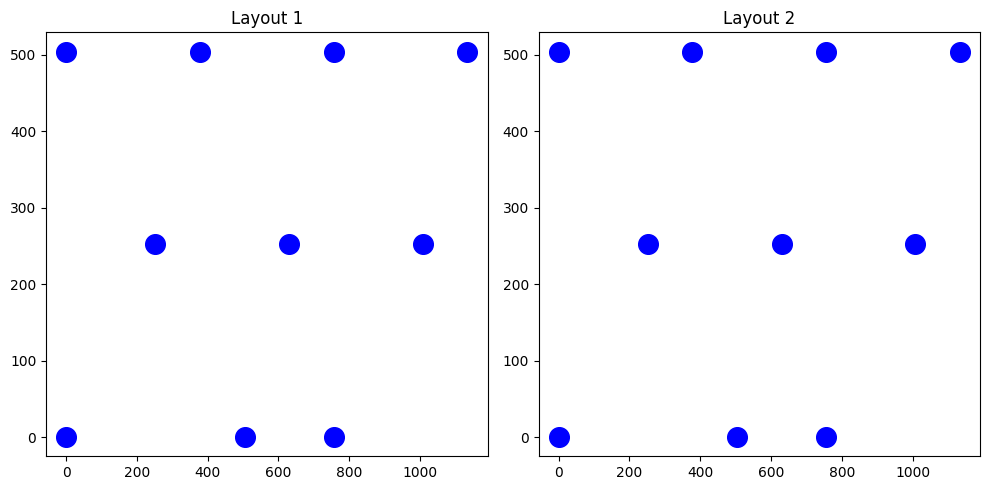

In [5]:
main()

In [3]:
# !pip install floris